###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 Lorena A. Barba, Tingyu Wang

# Eigenvectors for the win

In this third lesson of the module "Land on Vector Spaces," for learning practical linear algebra with Python, we focus all our attention on eigenvectors and eigenvalues. We do so emphasizing a geometric point of view to help develop a lasting understanding of the concepts, and computing with Python instead of tedious manual techniques. This way, we can quickly get to some applications and realize how important and useful they are.

The eigenvectors of a matrix are the special vectors that don't change direction after a linear transformation. _They don't get thrown off their span!_ This is so cool. The eigenvalues represent the scaling on the eigenvectors by the transformation. And that is  a surprisingly useful fact. 
Let's get eigen-cracking.

As always, start this lesson by loading your favorite Python libraries, and our custom plotting functions to help us out.

In [1]:
import numpy
%matplotlib inline
from matplotlib import pyplot

In [2]:
import sys
sys.path.append('../scripts/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

## Geometry of eigendecomposition

When you know the eigenvectors and eigenvalues, you know the matrix. Many applications of linear algebra benefit from expressing a matrix using its eigenvectors and eigenvalues (it often makes computations easier). 
This is called _eigendecomposition_—matrix decomposition is a central topic in linear algebra, and particularly important in applications.

### Eigenvectors revisited

In the previous lesson, we saw that a unit circle, by a 2D linear transformation, lands on an ellipse. The semi-major and semi-minor axes of the ellipse were in the direction of the *eigenvectors* of the transformation matrix. Now, you should know that this only happens wiht _symmetric_ matrices, but let's revisit this idea.


We'll work with the matrix $\,A = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$.

[[2 1]
 [1 2]]


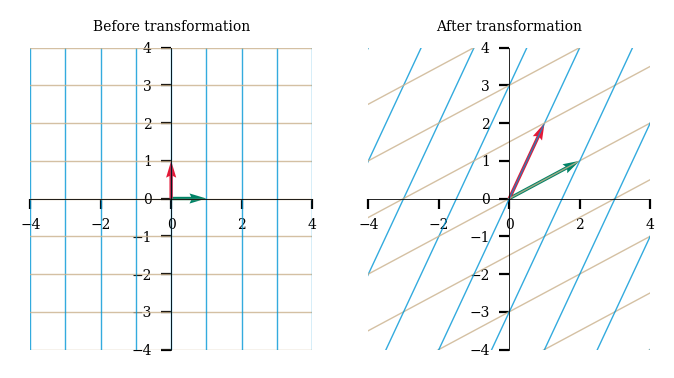

In [3]:
A = numpy.array([[2,1], [1,2]])
print(A)
plot_linear_transformation(A)

As in the previous lesson, plot a set of vectors of unit length (whose heads trace the unit circle), visualize the transformed vectors, then compute the length of the semi-major and semi-minor axes of the ellipse (the norm of the longest and shortest vectors in our set).

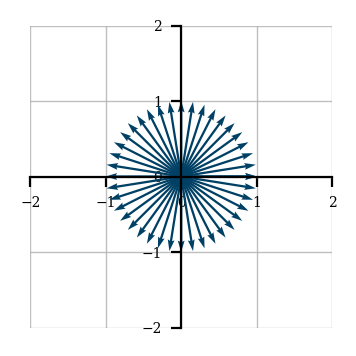

In [4]:
alpha = numpy.linspace(0, 2*numpy.pi, 41)
vectors = list(zip(numpy.cos(alpha), numpy.sin(alpha)))
newvectors = []
for i in range(len(vectors)):
    newvectors.append(A.dot(numpy.array(vectors[i])))

plot_vector(vectors)

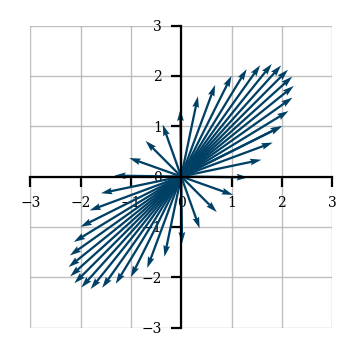

In [5]:
plot_vector(newvectors)

In [6]:
lengths = []
for i in range(len(newvectors)):
    lengths.append(numpy.linalg.norm(newvectors[i]))
semi_major = max(lengths)
print('Semi-major axis {:.1f}'.format(semi_major))
semi_minor = min(lengths)
print('Semi-minor axis {:.1f}'.format(semi_minor))

u1 = numpy.array([semi_major/numpy.sqrt(2), semi_major/numpy.sqrt(2)])
u2 = numpy.array([-semi_minor/numpy.sqrt(2), semi_minor/numpy.sqrt(2)])

Semi-major axis 3.0
Semi-minor axis 1.0


### A scaling transformation

OK, cool. In our first lesson, we saw some special transformations: _rotation_, _shear_, and _scaling_. 
Looking at the effect of the matrix transformation $A$ on the unit circle, we might imagine obtaining the same effect by first scaling the unit vectors—stretching $\mathbf{i}$ to $3\times$ its length and leaving $\mathbf{j}$ with length $1$—and then rotating by 45 degrees counter-clockwise.
We have also learned that applying linear transformations in sequence like this amounts to matrix multiplication.

Let's try it. We first define the scaling transformation $S$, and apply it to the vectors mapping the unit circle. 

In [7]:
S = numpy.array([[3,0], [0,1]])
print(S)

[[3 0]
 [0 1]]


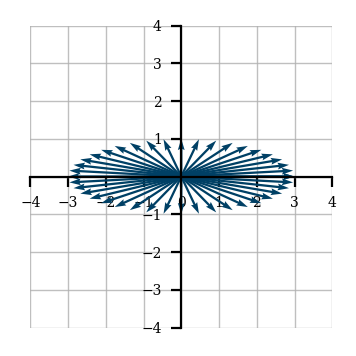

In [8]:
ellipse = []
for i in range(len(vectors)):
    ellipse.append(S.dot(numpy.array(vectors[i])))

plot_vector(ellipse)

### A rotation transformation

We figured out the matrix for a 90-degree rotation in our first lesson. But how do you rotate by any angle? You never have to memorize the "formula" for a rotation matrix. Just think about where the unit vectors land. Look at the figure below, and follow along on a piece of paper if you need to.

<img src="../images/rotation.png" style="width: 300px;"/> 
#### Rotation of unit vectors by an angle $\theta$ to the left.

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} \cos{\theta} \\ \sin{\theta} \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} -\sin{\theta} \\ \cos{\theta} \end{bmatrix}
$$

You now can build the rotation matrix using the column vectors where each unit vector lands.

$$R = \begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix}$$

Great. Let's define a matrix $R$ that rotates vectors by 45 degrees.

In [9]:
theta = numpy.pi/4
R = numpy.array([[numpy.cos(theta), -numpy.sin(theta)], 
                 [numpy.sin(theta), numpy.cos(theta)]])

We can apply this rotation now to the `ellipse` vectors, and plot the result.

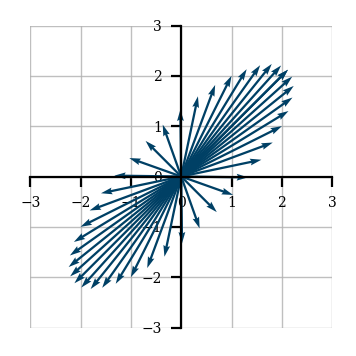

In [10]:
rotated = []
for i in range(len(vectors)):
    rotated.append(R.dot(numpy.array(ellipse[i])))

plot_vector(rotated)

### Composition of the transformations

It certainly _looks_ like we recovered the picture we obtained originally when applying the transformation $A$ to all our vectors on the unit circle.  

But have a look at the two transformations—the scaling $S$ and the rotation $R$—applied in sequence:

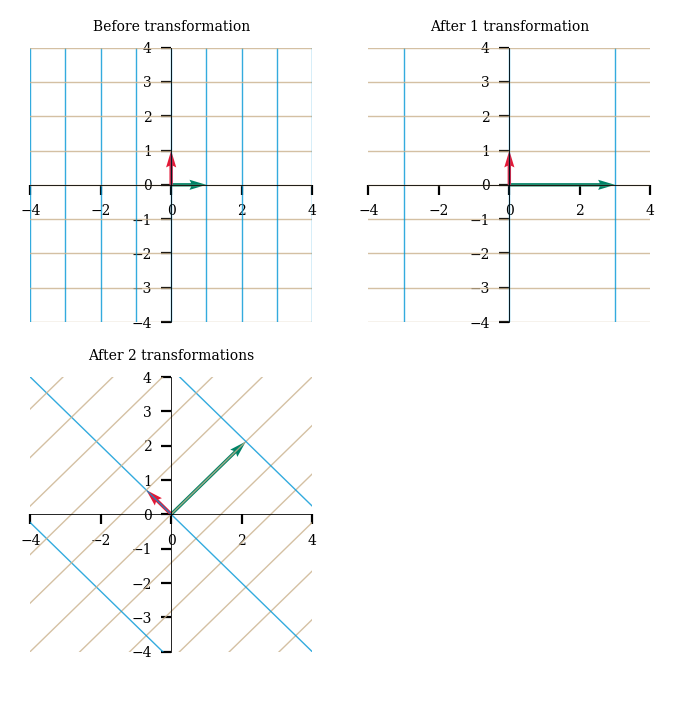

In [11]:
plot_linear_transformations(S,R)

Observe carefully the plot above. The scaling did stretch the basis vector $\mathbf{i}$ by $3\times$ its original length. It also left the basis vector $\mathbf{j}$ with its length equal to $1$. But something looks _really_ off after the second transformation. 

**What went wrong?** Let's investigate.

We know from the discussion in the previous lesson that the vector that lands on the ellipse's semi-major axis doesn't change direction. It's _not_ the basis vector $\mathbf{i}$ that lands there, it's the vector $\mathbf{v}_1$ that satisfies: 

$$ A \mathbf{v}_1 = s_1 \mathbf{v}_1 $$

Recalling the process we followed in the previous lesson, we find that vector, and plot it together with its transformed version (also called its _image_):

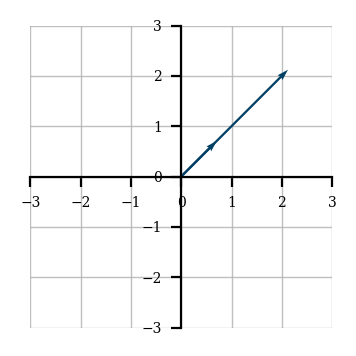

In [12]:
A_inv = numpy.linalg.inv(A)
v1 = A_inv.dot(u1)
plot_vector([u1,v1])

Right. The unit vector that was aligned with the 45-degree line got transformed onto the semi-major axis of the ellipse, without being rotated. This is the effect of the matrix $A$ on $\mathbf{v}_1$: _it is just scaled_.

Now, let's look at the sequence of transformations $S$ and $R$ applied to $\mathbf{v}_1$. We apply the transformations by matrix-vector multiplication, and in the second step, we use composition of transformations.

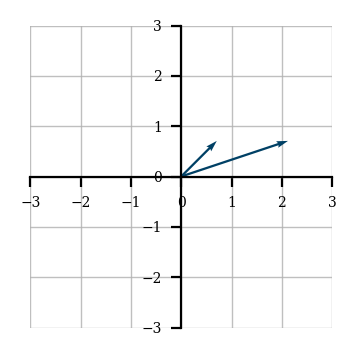

In [13]:
plot_vector([v1, S.dot(v1)])

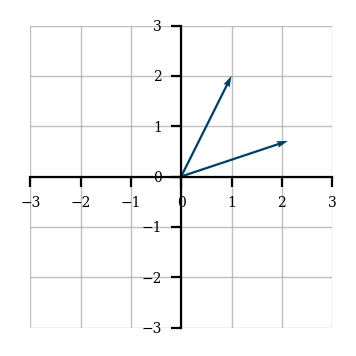

In [14]:
plot_vector([S.dot(v1),R.dot(S.dot(v1))])

That is definitely _not_ what we expected. Oh well. It seemed like a good idea at the time, but the scaling $S$ and the rotation $R$ applied in sequence are _not_ equivalent to the transformation $A$. 
Our visual intuition was not able to get the whole picture.

### Complete the composition

OK. This will blow your mind… to get the same transformation as $A$ we had to _first_ rotate 45 degrees to the right (which leaves the plot of our circle unchanged even though the vectors rotated), _then_ scale, and finally rotate 45 degrees to the left. 

We will look at this sequence of transformations via matrix multiplicaton. But first note that a rotation by a negative angle $\theta$ is achieved by the matrix:

$$R^T = \begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}$$

Check using a piece of paper that the columns of this matrix make sense for a negative angle $\theta$, and notice that it is the **transpose** of $R$, i.e., swaps rows and columns.
You can compute the transpose of a matrix in Python using [`numpy.matrix.transpose()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.transpose.html). Try it with some sample matrix, and print it with its transpose to visualize what happens.

In [15]:
B = numpy.array([[1,99], [2,100]])
print(B)
print(B.transpose())

[[  1  99]
 [  2 100]]
[[  1   2]
 [ 99 100]]


Now look at the result of the matrix multiplication (equivalent to the transformations in sequence, right to left):

In [16]:
R @ S @ R.transpose()

array([[2., 1.],
       [1., 2.]])

That's certainly the same as $A$!

In [17]:
print(A)

[[2 1]
 [1 2]]


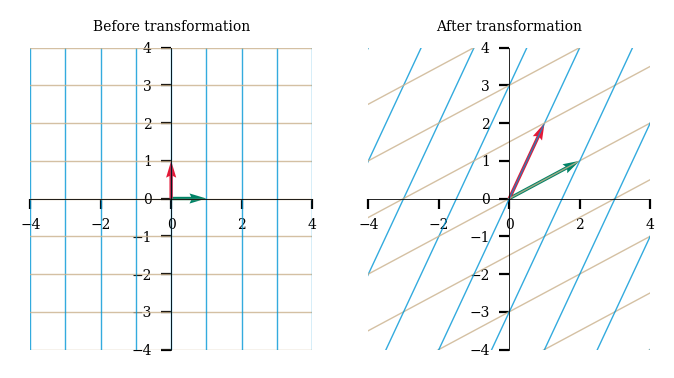

In [18]:
plot_linear_transformation(R @ S @ R.transpose())

We have some explaining to do. Let's visualize the transformation $R^T$, adding to our plot the unit vectors that were aligned with the eigenvectors, $\mathbf{v}_1$ and $\mathbf{v}_2$. You see that they land on the coordinate axes after the transformation.

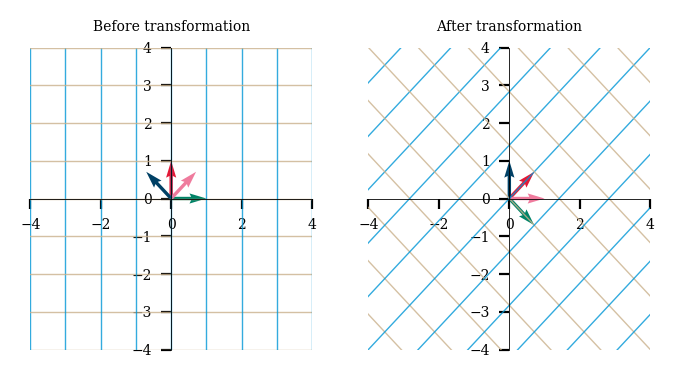

In [19]:
v2 = A_inv.dot(u2)
plot_linear_transformation(R.transpose(), v1, v2)

Now let's visualize applying  the scaling transformation to these vectors, and applying the rotation matrix $R$ after that.

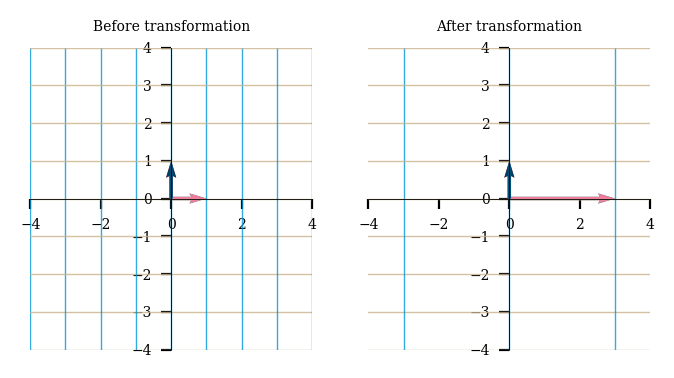

In [20]:
e1 = R.transpose().dot(v1)
e2 = R.transpose().dot(v2)

plot_linear_transformation(S, e1, e2)

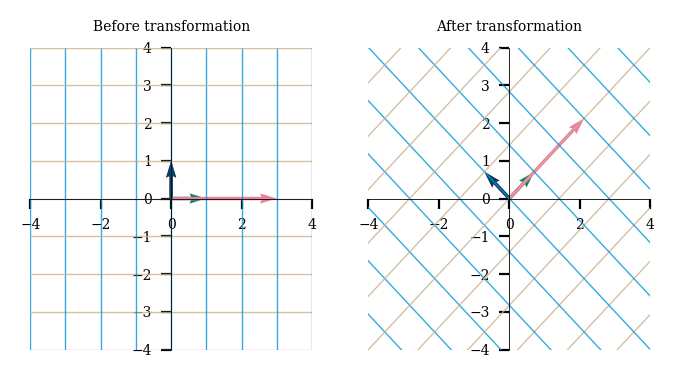

In [21]:
plot_linear_transformation(R, S.dot(e1), S.dot(e2))

Satisfied? The vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ are first rotated to land on the axes, are then scaled, and are finally rotated back to their original direction. This has the same effect as the transformation $A$. In other words:


$$ A = R\, S\, R^T 
$$

The equivalence above shows an **eigendecomposition** of the matrix $A$. 
The scaling matrix $S$ has the *eigenvalues* along the diagonal, and the rotation matrix $R$ has the *eigenvectors* as columns. Let's check:

In [22]:
print(R[:,0])
print(v1)

[0.70710678 0.70710678]
[0.70710678 0.70710678]


In [23]:
print(R[:,1])
print(v2)

[-0.70710678  0.70710678]
[-0.70710678  0.70710678]


### Symmetric matrices, orthogonal eigenvectors

In our example, we figured out that the matrix that undoes the effect of the positive rotation $R$ is its transpose, $R^T$. But in general, the matrix that has the effect of undoing a transformation is the _inverse_ of this matrix. In fact, $R$ is special, because

$$ R^T = R^{-1} $$

##### Definition:

> A matrix $R$ whose transpose is equal to its inverse is called **orthogonal**.

The columns of an orthogonal matrix are orthogonal vectors of unit length (a.k.a., _orthonormal_). For our example, it means that the _eigenvectors of $A$ are orthogonal_.
This always happens with _symmetric matrices_. 

In [24]:
print(R.transpose())

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [25]:
print(numpy.linalg.inv(R))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


You can check visually that $R^T$ is equal to $R^{-1}$—but if we try a logical expression, it will give `False` because of floating-point errors. To check for the symmetry of $A$, we can use a logical operation:

In [26]:
A == A.transpose()

array([[ True,  True],
       [ True,  True]])

And to confirm that the two eigenvectors are orthogonal, we take the dot product, which is zero for perpendicular vectors:

In [27]:
v1.dot(v2)

0.0

##### Key idea:

> A _symmetric_ matrix, $\,A = A^T$, has _orthogonal_ eigenvectors, and can be decomposed as $A = R\, S\, R^T$, where $R$ has the eigenvectors as columns and $S$ is the diagonal matrix of eigenvalues.

## Eigendecomposition in general

Up to this point, we've been playing with a symmetric matrix. The geometric insight we developed showed us that the eigenvectors landed onto the semi-major and semi-minor axis of the ellipse coming from the unit circle. But most matrices are not symmetric!
Let's work the general case. The eigenvectors of $A$ get scaled after the transformation, i.e., land on their span:

$$
\begin{align*}
  A \mathbf{v_1} = s_1 \mathbf{v_1} \\
  A \mathbf{v_2} = s_2 \mathbf{v_2}
\end{align*}
$$

The two left-hand sides are matrix-vector multiplications, each giving a vector as result. The two right-hand sides are scalings of a column vector (also resulting in vectors). We would like to combine the two equations together into a matrix equation, leading to the eigendecomposition of $A$.

Our first idea is this: matrix-matrix multiplication is the same as applying a transformation via the matrix on the left, to the columns of the matrix on the right. So if we make a matrix with the two eigenvectors as columns, and multiply it with $A$:

$$ A \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2}
    \end{bmatrix}
    = \begin{bmatrix}
    A\mathbf{v_1} & A\mathbf{v_2}
    \end{bmatrix}
$$

We can now re-write the eigenvector equations into one matrix equation by matching columns:

$$ A \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2}
    \end{bmatrix}
    = \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
$$

Using $C$ to denote the matrix of eigenvectors, the left-hand side of this matrix equation is $A\, C$.  We can express the right-hand side of the combined eigenvector equations also using $C$, by working with each column:

$$ s_1 \mathbf{v_1} = \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \,
    \begin{bmatrix}
    s_1 \\
    0 
    \end{bmatrix} 
$$

$$ s_2 \mathbf{v_2} = \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \,
    \begin{bmatrix}
    0 \\
    s_2 
    \end{bmatrix} 
$$

Matchng the columns, and applying our first idea for matrix-matrix multiplication: 

$$  \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
    = C\, 
    \begin{bmatrix}
    s_1 & 0 \\
    0 & s_2
    \end{bmatrix}  
$$

Using $D$ to denote the diagonal matrix of eigenvalues, this all comes together as:

$$
  A\, C = C\, D
$$

If we right-multiply by $C^{-1}$ on both sides:

$$
  A = C\, D\, C^{-1}
$$

A matrix that can be decomposed in this way is called **diagonalizable**.
Multiplying on the right by $C$ and on the left by $C^{-1}$:

$$
  C^{-1} A\, C = D
$$


If you go back to the previous lesson, you will find an expression that looks like this for applying a known transformation to a vector in a new basis. Review that section if you need to.

Applying the transformation $A$ to a vector in standard basis, $\mathbf{x}$, is:

$$
  A\, \mathbf{x} = C\, D\, C^{-1}\mathbf{x}
$$

Viewing $C$ as a change of basis, the expression on the right means we change $\mathbf{x}$ to a new basis of eigenvectors, apply a scaling by the eigenvalues in the new coordinate system, and change back to the standard basis. The effect is the same as the transformation $A$: the matrices $A$ and $D$ are called **similar**.

##### Key idea:

> Similar matrices have the same effect, via a change of basis.

Now let's visualize the eigendecomposition of a non-symmetric matrix $A = \begin{bmatrix} 1 & 0 \\ 1 & 3 \end{bmatrix}$. The red unit circle below represents a bunch of vectors of different angles whose tails sit at the origin and whose heads land on the circle. Each point on this circle corresponds to some vector $\mathbf{x}$. The second subplot shows the change from the standard basis $\mathbf{i}$ and $\mathbf{j}$ to the new basis $\mathbf{a}$ and $\mathbf{b}$. Notice that the red circle representing $\mathbf{x}$ does not change, however, the vector $\mathbf{x}$'s new coordinates are now $C^{-1}\mathbf{x}$. The third subplot demonstrates the stretching effect coming from the diagonal matrix $D$ in the new basis. The transformed vector's coordinates are $DC^{-1}\mathbf{x}$ in the new basis. Finally, we change back to the standard basis by multiplying $C$ as shown in the subplot 4.

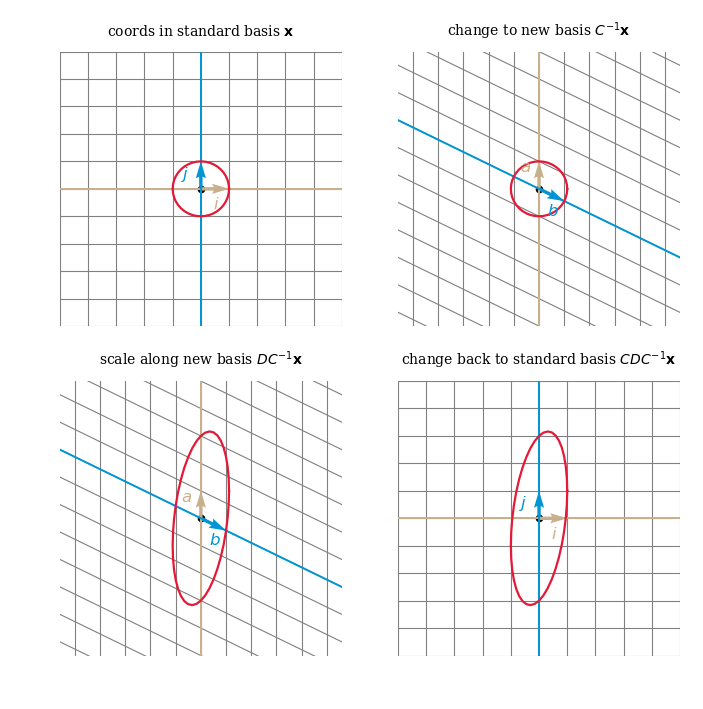

In [28]:
A = numpy.array([[1,0], [1,3]])
plot_eigen(A)

##### Challenge:
> What is the relation between the new basis $\mathbf{a}$, $\mathbf{b}$ and the matrix of eigenvectors $C$?

## Compute eigenthings in Python

You can compute the eigenvalues and eigenvectors of a matrix using [`numpy.linalg.eig()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html). It returns a tuple: its first element is an array with the eigenvalues, and its second element is a 2D array  where each column is an eigenvector.

In [29]:
numpy.linalg.eig(A)[0]

array([3., 1.])

In [30]:
numpy.linalg.eig(A)[1]

array([[ 0.        ,  0.89442719],
       [ 1.        , -0.4472136 ]])

In [31]:
# display each eigenvalue with the corresponding eigenvector, side by side
eigenvalues, eigenvectors = numpy.linalg.eig(A)

for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    print(eigenvalue, eigenvector)

3.0 [0. 1.]
1.0 [ 0.89442719 -0.4472136 ]


In the `for` statement above, each iteration picks an eigenvalue, and the corresponding eigenvector. Note that when iterating over a 2D array, the natural order advances over the first dimension: the rows; to get the columns, we apply the transpose of the `eigenvectors` matrix. Here, we used the [`numpy.ndarray.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), which has the same effect as `.transpose`.

To create the diagonal matrix of eigenvalues, use [`numpy.diag()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html): if you give it a 1D array, it returns a 2D array with the elements of the input array in the diagonal. 

The eigendecomposition is shown below: 

In [32]:
C = eigenvectors
A_decomp = C @ numpy.diag(eigenvalues) @ numpy.linalg.inv(C)
print(A_decomp)

[[1. 0.]
 [1. 3.]]


Another way to compute all the eigenthings is to use **SymPy**: the Python library for symbolic computations (a.k.a., computer algebra system). SymPy has a [`Matrix`](https://docs.sympy.org/latest/tutorial/matrices.html) data type with many advanced methods. 

You will create a `Matrix` from a list of row vectors, and then use the `diagonalize()` method to obtain the matrix of eigenvectors, and the diagonal matrix of eigenvalues. 
SymPy can display beautiful symbolic mathematics. Check it out.

In [33]:
import sympy

sympy.init_printing(use_latex = 'mathjax') #configures the display of mathematics

In [34]:
A = sympy.Matrix([[2,1], [1,2]])
A

⎡2  1⎤
⎢    ⎥
⎣1  2⎦

In [35]:
A == A.transpose()

True

In [36]:
C, D = A.diagonalize()
D

⎡1  0⎤
⎢    ⎥
⎣0  3⎦

With SymPy, you can also get just the eigenvalues using the [`eigenvals()`](https://docs.sympy.org/latest/tutorial/matrices.html#eigenvalues-eigenvectors-and-diagonalization) method. Its output will be in the form $\{s_1:m_1, s_2:m_2\}$, where $s_1$, $s_2$ are the eigenvalues of the matrix, and $m_1$, $m_2$ are the _multiplicities_. A matrix can have (multiply) repeated eigenvalues sometimes. In the case of our matrix $A$, both eigenvalues are unique (i.e., have multiplicity $1$).

In [37]:
A.eigenvals()

{1: 1, 3: 1}

But think of the identity matrix: it has $1$ along the diagonal, and the two eigenvalues are the same, $1$. We can create an identity matrix in SymPy using `eye(n)`, with `n` indicating the dimension.

In [38]:
sympy.eye(2).eigenvals()

{1: 2}

If we try with the _shear_ matrix from our first lesson, we see that it also has a repeated $1$ eigenvalue.

In [39]:
shear = sympy.Matrix([[1,1], [0,1]])
shear

⎡1  1⎤
⎢    ⎥
⎣0  1⎦

In [40]:
shear.eigenvals()

{1: 2}

Let's have a look back at the equation for the eigenvectors—on which the effect of a matrix $A$ is just to scale them—and rearrange things a bit:

$$ \begin{align*}
  A\, \mathbf{v} &= s\, \mathbf{v}\\
  A\, \mathbf{v} - s\, \mathbf{v} &= \mathbf{0} \\
  (A - s\, I) \mathbf{v} &= \mathbf{0}
\end{align*}
$$

The last form represents a homogeneous linear system, whose solutions are the _nullspace_ of $(A-s\,I)$, as we saw in our second lesson. We can compute the nullspace using SymPy; let's try it with the shear matrix:

In [41]:
(shear - sympy.eye(2)).nullspace()

⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎣⎣0⎦⎦

The [`nullspace()`](https://docs.sympy.org/latest/tutorial/matrices.html#nullspace) method of SymPy matrices returns a list of column vectors that span the nullspace of the matrix. In the case of the shear matrix, only one column vector is returned, which means  its nullspace is a line.

The shear matrix has one repeated eigenvalue, and a single eigenvector: we cannot build a change of basis with its eigenvectors, which means it's _not diagonalizable_.

If you tried to use `diagonalize()` on the shear matrix, you would get an error message:
```Pyhon
MatrixError: Matrix is not diagonalizable
```

## Applications

### Eigenvalues in ecology

A neat application of linear algebra is _matrix population models_, used broadly in ecology and demographics. One type of model considers the age distribution of fertility and survival in an animal or plant population. For example, an insect population may have different probability of survival depending on the stage of development, and only be able to reproduce in an adult stage.

Here's an example, from [$\S$5.6](https://textbooks.math.gatech.edu/ila/stochastic-matrices.html) of the open book _"Interactive Linear Algebra"_ [1]. 
We take three age groups in a population of rabbits. Of the newborn rabbits, 50% survive their first year. The survival of the second age group is also 50%, and the third age group all dies off at the end of the year. The annual fertility of each age group is 0, 6, and 8 rabbits, respectively.

A population vector $\mathbf{p}=(p_1, p_2, p_3)$ contains the abundance of rabbits in each age group. We can use the fertility and survival of each age group to predict the abundance of each group after one year:

$$\begin{align*}
  p_1^{n+1} &=& 0\,p_1^n + 6\,p_2^n + 8\,p_3^n \\
  p_2^{n+1} &=& 0.5\,p_1^n + 0\,p_2^n + 0\,p_3^n \\
  p_3^{n+1} &=& 0\,p_1^n + 0.5\,p_2^n + 0\,p_3^n
\end{align*}
$$

The superscript $n$ refers to the year. The coefficient matrix of this system of equations is:

$$ L = \begin{bmatrix} 0 & 6 & 8 \\
                       0.5 & 0 & 0 \\
                       0 & 0.5 & 0 \end{bmatrix}
$$

This matrix represents the _age transition_ year on year. Multiply this matrix by the population vector to get the age-structured population on the next year. Let's write a bit of code to see the population in each age group grow over 10 years. 

In [42]:
L = numpy.array([[0,6,8], [0.5,0,0], [0,0.5,0]])
L

array([[0. , 6. , 8. ],
       [0.5, 0. , 0. ],
       [0. , 0.5, 0. ]])

In [43]:
p = numpy.array([25, 10, 5]) # initial age-structured population

In [44]:
N = 10
pn = numpy.zeros((N, len(p)))
pn[0,:] = p.copy()
for i in range(1,N):
    pn[i,:] = L.dot(pn[i-1,:])

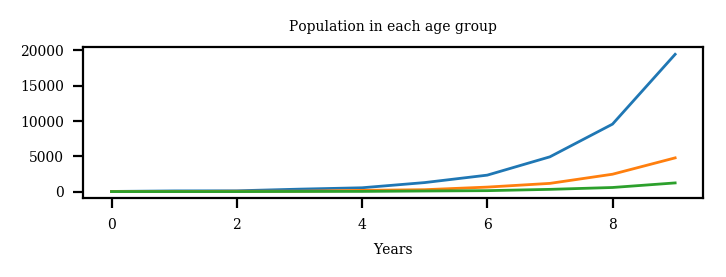

In [45]:
pyplot.figure(figsize=(4,1))
pyplot.plot(pn[:,0],)
pyplot.plot(pn[:,1],)
pyplot.plot(pn[:,2],)
pyplot.xlabel('Years')
pyplot.title('Population in each age group');

Nothing to see here: the population in each age group grows over time. But one question ecologists may need to answer is whether the species reaches a stable growth pattern, and what is the _stable age distribution_. That occurs if the percentage in each age group remains the same, i.e., $\mathbf{p}^{n+1}$ is a multiple of $\mathbf{p}^n$:

$$ \mathbf{p}^{n+1} = L\, \mathbf{p}^n = r\, \mathbf{p}^n $$

We have on the right an eigenvalue problem, and the stable age distribution is an eigenvector of the age transition matrix.

A classic example in this field is the hypothetical beetle population of Bernadelli [2], also separated in three age groups, and with age transition matrix:

$$ T = \begin{bmatrix} 0 & 0 & 6 \\
                       1/2 & 0 & 0 \\
                       0 & 1/3 & 0 \end{bmatrix}
$$

In [46]:
T = numpy.array([[0,0,6], [0.5,0,0], [0,1/3,0]])

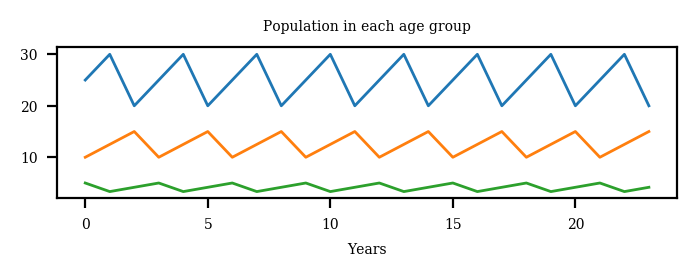

In [47]:
p = numpy.array([25, 10, 5])
N = 24
pn = numpy.zeros((N, len(p)))
pn[0,:] = p.copy()
for i in range(1,N):
    pn[i,:] = T.dot(pn[i-1,:])
    
pyplot.figure(figsize=(4,1))
pyplot.plot(pn[:,0],)
pyplot.plot(pn[:,1],)
pyplot.plot(pn[:,2],)
pyplot.xlabel('Years')
pyplot.title('Population in each age group');

In this case, the initial population distribution repeats every few years! If we look at the eigenvectors for the matrix, in this case ... gadzooks! They are complex numbers.
In Python, complex numbers are represented as the sum of a real part and an imaginary part, using the symbol `j` for the imaginary unit corresponding to $\sqrt{-1}$.

In [48]:
numpy.linalg.eig(T)[0]

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

### Markov chains

Population models are one example of _discrete dynamical systems_, where eigenvalues and eigenvectors play a central role. Another example are _Markov chains_, of broad application in economics, genetics, game theory, and more.

This example is from Ref. [1]. A movie rental company has three offices in a city. You can rent movies from one office, and return them the next day in any office. Suppose the 3D vector $\mathbf{x}$ represents the percentage of the stock of "The Matrix" in each office. 

From historical data, one could build a matrix $P$ with the probabilities that a customer rented "The Matrix" from office $j$ and returns it at office $i$ the next day. Say, 

$$ P = \begin{bmatrix} 0.3 & 0.4 & 0.5 \\
                       0.3 & 0.4 & 0.3 \\
                       0.4 & 0.2 & 0.2 \end{bmatrix}
$$

A customer must return the movie in one of the three offices, so the probabilities for the three offices have to add up to $1$.
If $\mathbf{x}_k$ is the movie-stock distribution on a given day, then $P\,\mathbf{x}_k$ is the per-office distribution on the next day:

$$ \mathbf{x}_{k+1} = P\,\mathbf{x}_k  $$

##### Definition:

> A **probability vector** has non-negative components that add to $1$. A **stochastic matrix** is a square matrix whose columns are probability vectors.

> A **Markov chain** is a sequence of probability vectors $ \mathbf{x}_{k+1} = P\,\mathbf{x}_k  $, where $P$ is a stochastic matrix.

Let's play with with the stochastic matrix $P$. We can visually see that each column adds up to $1$, so no need to compute that. But let's get the eigenvalues and eigenvectors using SymPy.

In [49]:
P = sympy.Matrix([[0.3,0.4,0.5], [0.3,0.4,0.3],[0.4,0.2,0.2]])

In [50]:
P.eigenvals()

{-1/5: 1, 1/10: 1, 1: 1}

In [51]:
P.eigenvects()

⎡⎛         ⎡⎡-1.0⎤⎤⎞  ⎛        ⎡⎡0.5 ⎤⎤⎞  ⎛        ⎡⎡1.4⎤⎤⎞⎤
⎢⎜         ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟⎥
⎢⎜-0.2, 1, ⎢⎢ 0  ⎥⎥⎟, ⎜0.1, 1, ⎢⎢-1.5⎥⎥⎟, ⎜1.0, 1, ⎢⎢1.2⎥⎥⎟⎥
⎢⎜         ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟⎥
⎣⎝         ⎣⎣1.0 ⎦⎦⎠  ⎝        ⎣⎣1.0 ⎦⎦⎠  ⎝        ⎣⎣1.0⎦⎦⎠⎦

We see that the largest eigenvalue is $1$. This is true for _all_ stochastic matrices, in fact: they have $1$ as eigenvalue and all other eigenvalues are smaller in absolute value.

##### Key idea:

> Stochastic matrices have $1$ as the dominant eigenvalue: if $s_k$ are the eigenvalues, $|s_k|\leq 1$.

Think about it: multiplying a matrix by the vector of ones $(1, 1, 1)$ adds up the rows (linear combination of the columns, each multiplied by $1$). For a stochastic matrix $P$, the rows of the transpose $P^T$ add up to $1$, so: $P^T \mathbf{1} = \mathbf{1}$, which means $1$ is an eigenvalue of $P^T$ and $P$ (a matrix and its transpose have the same eigenvalues).

In [52]:
one_vector = sympy.Matrix([1,1,1])

P.transpose()@one_vector

⎡1.0⎤
⎢   ⎥
⎢1.0⎥
⎢   ⎥
⎣1.0⎦

In [53]:
P.eigenvals() == P.transpose().eigenvals()

True

Let's see what happens to the vector $\mathbf{x}$, representing the percentages of the movie stock in each office, after several days.

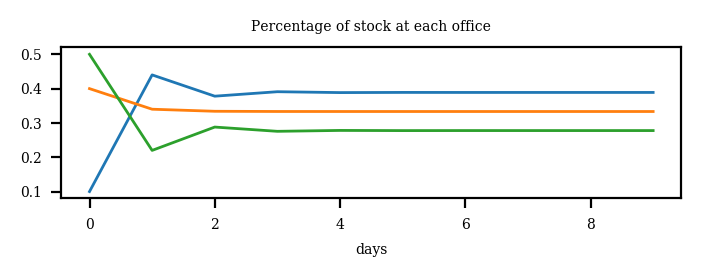

In [54]:
P2 = numpy.array(P)
x = numpy.array([0.1, 0.4, 0.5])
N = 10
xn = numpy.zeros((N, len(p)))
xn[0,:] = x.copy()
for i in range(1,N):
    xn[i,:] = P2.dot(xn[i-1,:])
    
pyplot.figure(figsize=(4,1))
pyplot.plot(xn[:,0],)
pyplot.plot(xn[:,1],)
pyplot.plot(xn[:,2],)
pyplot.xlabel('days')
pyplot.title('Percentage of stock at each office');

You can try it with different initial distributions of the movie stock, and you will see that the long-term distribution is always the same: the long-term behavior of a Markov chain is a **steady state**. This steady state is aligned with the eigenvector corresponding to eigenvalue $1$. Let's check:

In [55]:
steady = sympy.Matrix(xn[-1,:])
steady.normalized()

⎡0.667424016931347⎤
⎢                 ⎥
⎢0.572077528097156⎥
⎢                 ⎥
⎣0.476731038919718⎦

In [56]:
evec = sympy.Matrix(P.eigenvects()[2][2])
evec.normalized()

⎡0.667423812471915⎤
⎢                 ⎥
⎢0.572077553547355⎥
⎢                 ⎥
⎣0.476731294622796⎦

The normalized steady-state vector and eigenvector corresponding to the $1$ eigenvalue are the same, up to a small difference that will diminish if we add more steps to the chain.

How can we explain this? First, remember that $ \mathbf{x}_{k+1} = P\,\mathbf{x}_k  $. So, $ \mathbf{x}_2 = P\, \mathbf{x}_1 = P^2 \mathbf{x}_0 $. In general,

$$ \mathbf{x}_{k} = P^{k}\,\mathbf{x}_0  $$

Second, the eigenvectors form a basis, so we can write any vector as a linear combination of them. Let's call them $\mathbf{e}_1$, $\mathbf{e}_2$, $\mathbf{e}_3$:
$$ \mathbf{x}_0 = c_1 \mathbf{e}_1 + c_2 \mathbf{e}_2 + c_3 \mathbf{e}_3 $$

Multiply by the matrix $P$ on both sides, and on the right side use the definition of eigenvectors that $P \mathbf{e}_i = s_i \mathbf{e}_i$ (where $s_i$ are the eigenvalues):

$$ P\, \mathbf{x}_0 = c_1 s_1\mathbf{e}_1 + c_2 s_2\mathbf{e}_2 + c_3 s_3\mathbf{e}_3 $$

If you multiply $k$ times by $P$, you get:

$$ P^{\,k}\, \mathbf{x}_0 = c_1 s_1^k\mathbf{e}_1 + c_2 s_2^k\mathbf{e}_2 + c_3 s_3^3\mathbf{e}_3 $$

The only term in the linear combination that survives long-term is the one aligned with the eigenvector corresponding to eigenvalue $1$. The powers of other eigenvalues for which $|s_i|<1$ all tend to zero as $k$ increases.

##### Key idea:

> A **steady state** of a Markov chain is an eigenvector of the stochastic matrix, corresponding to eigenvalue $1$.

##### Perron-Frobenius Theorem

> A _positive stochastic matrix_ (all positive entries) has a unique steady state vector to which all initial states converge.

Here's another way to look at it (see $\S$6.6 of Ref. [1] for more discussion). The eigendecomposition of $P$ is formed with the two matrices returned by `diagonalize()`: 

In [57]:
P.diagonalize()

⎛⎡-1.0  1.0   7.0⎤  ⎡-0.2   0    0 ⎤⎞
⎜⎢               ⎥  ⎢              ⎥⎟
⎜⎢ 0    -3.0  6.0⎥, ⎢ 0    0.1   0 ⎥⎟
⎜⎢               ⎥  ⎢              ⎥⎟
⎝⎣1.0   2.0   5.0⎦  ⎣ 0     0   1.0⎦⎠

The matrix $P$ is _similar_ (has the same effect via a change of basis) to a scaling matrix which, when repeatedly applied, shrinks al components _not_ parallel to the eigenvector corresponding to eigenvalue $1$.

### Google's PageRank algorithm

Web search today uses a variety of technologies, but the original algorithm that rocketed Google to the top of search engines is the _PageRank_ algorithm. Google's own description was:

> PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

(Cited in the Wikipedia entry for [PageRank](https://en.wikipedia.org/wiki/PageRank), from an archived Google web page.)

A web page's rank of importance is computed from the number of links to it, and the importance of the pages that link to it. The rule is that a page linking to $n$ other pages passes to them $1/n$ of its importance. A page's rank is the sum of all the importance it gets from other pages linking to it.

For a network of $n$ web pages, you form a matrix whose $i,j$ entry is the importance page $j$ passes to $i$.
Here's an example from Ref. [1]. We have a network with four web pages, connected by links as shown in the figure below.

![](../images/PR-4pages.png)
#### Example network of four web pages, from Ref. [1], $\S$6.6.

* Page A has 3 links: it passes $1/3$ of its rank to $B, C, D$
* Page B has 2 links: it passes $1/2$ of its rank to $C, D$
* Page C has 0 links
* Page D has 2 links: it passes $1/2$ of its rank o $A,C$

The importance matrix is:
$$A = \begin{bmatrix} 0   & 0   & 0 & 1/2 \\
                       1/3 & 0   & 0 & 0  \\
                       1/3 & 1/2 & 0 & 1/2 \\
                       1/3 & 1/2 & 0 & 0 \end{bmatrix}
$$

This would be a stochastic matrix, except for the column of zeros, due to a web page with no links. Fix this problem by replacing the zeros in that column with $1/n$. This _modified_ importance matrix, $A^{\prime}$ is always stochastic.  Now choose a value $p \in (0,1)$, called the _damping factor_, to build the **Google matrix** as follows:

$$
  G = (1-p)\, A^{\prime} + p\, B
$$

where $B$ is an $n\times n$ matrix with $1/n$ in every entry.

##### Key idea: 

> The Google matrix is a positive stochastic matrix. The PageRank vector is the steady state vector of the Markov chain with this matrix.

Let's play with a network of four pages like the one illustrated above, but fill the column corresponding to $C$ with $1/4$. Choose $p=0.15$ for the damping factor.

In [58]:
Amod = numpy.array([[0,0,1/4, 1/2], [1/3,0,1/4,0], [1/3,1/2,1/4,1/2],[1/3,1/2,1/4,0]])
Amod

array([[0.        , 0.        , 0.25      , 0.5       ],
       [0.33333333, 0.        , 0.25      , 0.        ],
       [0.33333333, 0.5       , 0.25      , 0.5       ],
       [0.33333333, 0.5       , 0.25      , 0.        ]])

Let's write a Python function with the PageRank algorithm, taking as inputs the modified importance matrix, the damping factor, and a tolerance to exit the Markov chain. The function initializes a random starting vector (normalized), computes the Google matrix, then applies it repeatedly until two successive state vectors are "close enough" to each other (i.e., by less than the tolerance).

In [59]:
def pagerank(Amod, p=0.15, eps=1e-3):
    '''Implements the PageRank algorithm
    Arguments:
    Amod numpy array, modified importance matrix
    p    float, damping factor
    eps  float, tolerance to exit the iterations
    
    Returns:
    v (normalized) numpy array, PageRank vector
    '''
    n = Amod.shape[1]
    v = numpy.random.rand(n,1)
    v = v/numpy.linalg.norm(v)
    G = (1-p)*Amod + p*1/n*numpy.ones((n,n))
    vold = numpy.zeros((n,1))
    
    while numpy.linalg.norm(v-vold, 2)>eps:
        vold = v.copy()
        v = G.dot(v)
        
    return v/numpy.sum(v)

In [60]:
v = pagerank(Amod)
v

array([[0.2193081 ],
       [0.17521869],
       [0.35582464],
       [0.24964857]])

The result above is the PageRank vector for this small network of four web pages. The largest vector value is the third component, corresponding to page $C$, the highest-ranked page. Page $B$ is the lowest ranked (second component).
The interpretation of this result is as a probability distribution for the likelihood that a person surfing the web will randomly click through to arrive at one of the pages in the network. 

##### Exercise

Build the Google matrix with $p=0.15$ for the network illustrated below, then find the PageRank vector. Ponder the result and identify the highest ranked and lowest ranked pages.

![](../images/google-irreducible.png)
#### Example network with eight web pages, from Ref. [3], $\S$4.5.

## References

1. Dan Margalit and Joseph Rabinoff (2018), [_Interactive Linear Algebra_](https://textbooks.math.gatech.edu/ila/index.html), an open book under the GNU Free Documentation License, Version 1.2.

2. Bernardelli, H. (1941), Population waves, Journal of the Burma Research Society 31, Part 1. Also in _Mathematical Demography, Selected Papers_ (1977), pp. 215-219. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-642-81046-6_24

3. David Austin (2019), [_Understanding Linear Algebra_](http://merganser.math.gvsu.edu/david/linear.algebra/ula/ula/ula.html), an open book under CC-By license.

In [61]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())